In [22]:
# CONFIGURAR DATAFRAME PARA ANÁLISIS
if 'df_principal' in locals():
    print(f"Dataset cargado: {len(df_principal)} registros, {len(df_principal.columns)} columnas")
    
    # Crear copia del dataframe principal
    df = df_principal.copy()
    
    # Verificar columna de género y convertir
    if 'Sexo' in df.columns:
        # Convertir valores de género a los códigos esperados por las funciones
        df['SEXO'] = df['Sexo'].map({'Hombres': 'H', 'Mujeres': 'M'})
        print(f"✅ Columna SEXO configurada correctamente")
        
        # Verificar distribución por género
        distribucion = df['SEXO'].value_counts()
        print(f"   Distribución: {distribucion.to_dict()}")
    
    # Buscar las columnas que necesitamos
    columnas_buscadas = [
        'sb_mas_comp_salariales_equiparado',
        'sb_mas_comp_total_equiparado',
        'salario_base_equiparado',
        'complementos_salariales_equiparados',
        'complementos_extrasalariales_equiparados'
    ]
    
    print("\nVerificando columnas necesarias:")
    for col in columnas_buscadas:
        if col in df.columns:
            print(f"   ✅ {col} - ENCONTRADA")
        else:
            print(f"   ❌ {col} - NO ENCONTRADA")
    
    print(f"\n✅ DataFrame df configurado correctamente para análisis")
else:
    print("❌ df_principal no está cargado")

Dataset cargado: 150 registros, 282 columnas
✅ Columna SEXO configurada correctamente
   Distribución: {'H': 106, 'M': 44}

Verificando columnas necesarias:
   ✅ sb_mas_comp_salariales_equiparado - ENCONTRADA
   ✅ sb_mas_comp_total_equiparado - ENCONTRADA
   ✅ salario_base_equiparado - ENCONTRADA
   ✅ complementos_salariales_equiparados - ENCONTRADA
   ✅ complementos_extrasalariales_equiparados - ENCONTRADA

✅ DataFrame df configurado correctamente para análisis


# VISUALIZACIONES - REGISTRO RETRIBUTIVO
**Proyecto:** Equality Momentum - Análisis de Igualdad Retributiva  
**Descripción:** Notebook dedicado exclusivamente a generar visualizaciones profesionales para informes de igualdad salarial

## CONTENIDO
**Carga de datos procesados**
**Configuración de estilos y paletas**
**Visualizaciones principales**
**Exportación de gráficos**
**Fuente de datos:** `PRUEBA QLICK JULIO 2025_procesado.xlsx`

In [19]:
# CARGA DE DATOS PROCESADOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

# Paleta de colores para género
colores_genero = {
    'H': '#DC2626',  # Rojo para hombres
    'M': '#2E86AB',  # Azul para mujeres
}

# Obtener la ruta base del proyecto
ruta_base = Path.cwd().parent if Path.cwd().name == '04_SCRIPTS' else Path.cwd()

# Buscar el archivo más reciente en la carpeta de resultados
carpeta_resultados = ruta_base / '02_RESULTADOS'
print(f"Buscando archivos en: {carpeta_resultados}")

# Buscar archivos que empiecen con REPORTE_
archivos_reporte = list(carpeta_resultados.glob('REPORTE_*.xlsx'))
if archivos_reporte:
    # Tomar el archivo más reciente
    archivo_mas_reciente = max(archivos_reporte, key=os.path.getctime)
    ruta_datos = archivo_mas_reciente
    print(f"Archivo más reciente encontrado: {ruta_datos.name}")
else:
    # Fallback al archivo específico
    ruta_datos = carpeta_resultados / 'REPORTE_DATOS registro retributivo_20250902_235323.xlsx'
    print(f"Usando archivo específico: {ruta_datos}")

print(f"Cargando datos desde: {ruta_datos}")

# Leer todas las hojas del archivo procesado
datos_procesados = {}
try:
    archivo_excel = pd.ExcelFile(ruta_datos)
    for hoja in archivo_excel.sheet_names:
        datos_procesados[hoja] = pd.read_excel(archivo_excel, sheet_name=hoja)
        print(f"Cargada hoja '{hoja}': {len(datos_procesados[hoja])} registros")
except Exception as e:
    print(f"Error al cargar datos: {e}")

print("\nHojas disponibles en el archivo procesado:")
for hoja in datos_procesados.keys():
    print(f"  - {hoja}")

# Verificar si existe la hoja con datos procesados (actualizada)
if 'DATOS_PROCESADOS' in datos_procesados:
    df_principal = datos_procesados['DATOS_PROCESADOS']
    print(f"\nDataset principal cargado: {len(df_principal)} registros")
    print(f"Columnas principales: {list(df_principal.columns[:5])}...")
    
    # Verificar columnas clave
    columnas_clave = ['Sexo', 'Salario base anual efectivo', 'salario_base_equiparado']
    for col in columnas_clave:
        if col in df_principal.columns:
            print(f"Columna '{col}' encontrada")
        else:
            print(f"Columna '{col}' NO encontrada")
    
    # Mostrar todas las columnas disponibles para verificar
    print(f"\nTodas las columnas disponibles ({len(df_principal.columns)}):")
    for i, col in enumerate(df_principal.columns, 1):
        print(f"   {i:2d}. {col}")
    
else:
    print("No se encontró la hoja 'DATOS_PROCESADOS'")
    if datos_procesados:
        print("Hojas disponibles:")
        for hoja in datos_procesados.keys():
            print(f"  - {hoja}")

Buscando archivos en: c:\Users\juanf\Downloads\Equiality Momentum\02_RESULTADOS
Archivo más reciente encontrado: REPORTE_DATOS registro retributivo_20250903_002237.xlsx
Cargando datos desde: c:\Users\juanf\Downloads\Equiality Momentum\02_RESULTADOS\REPORTE_DATOS registro retributivo_20250903_002237.xlsx
Cargada hoja 'DATOS_PROCESADOS': 150 registros

Hojas disponibles en el archivo procesado:
  - DATOS_PROCESADOS

Dataset principal cargado: 150 registros
Columnas principales: ['Reg.', 'Orden', 'Sexo', 'Inicio de Sit. Contractual', 'Final de Sit. Contractual']...
Columna 'Sexo' encontrada
Columna 'Salario base anual efectivo' encontrada
Columna 'salario_base_equiparado' encontrada

Todas las columnas disponibles (282):
    1. Reg.
    2. Orden
    3. Sexo
    4. Inicio de Sit. Contractual
    5. Final de Sit. Contractual
    6. ¿Es una persona con discapacidad?
    7. ¿Forma parte del órgano de representación de la plantilla?
    8. Edad / fecha de nacimiento
    9. Situación Familiar
 

In [10]:
# GRÁFICOS DE DONUT - COMPARACIÓN SALARIAL POR GÉNERO

def formato_numero_es(numero, decimales=0):
    """
    Formatea números usando convención española: punto como separador de miles, coma como decimal
    """
    if decimales == 0:
        return f"{numero:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")
    else:
        return f"{numero:,.{decimales}f}".replace(",", "X").replace(".", ",").replace("X", ".")

def formato_porcentaje(pct):
    """
    Función personalizada para formatear porcentajes en estilo español
    """
    return formato_numero_es(pct, 1) + '%'

def crear_grafico_donut(datos_genero, titulo, subtitulo="", formato_moneda=True):
    """
    Crea un gráfico de donut comparando salarios promedio por género
    
    Parámetros:
    - datos_genero: dict con claves 'H' y 'M' y valores numéricos
    - titulo: título principal del gráfico
    - subtitulo: subtítulo opcional
    - formato_moneda: si True, formatea los valores como moneda
    """
    # Configurar la figura
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Datos para el gráfico
    valores = list(datos_genero.values())
    etiquetas = ['Hombres', 'Mujeres']
    colores = [colores_genero['H'], colores_genero['M']]
    
    # Crear el gráfico de donut con formato estándar
    wedges, texts, autotexts = ax.pie(
        valores, 
        labels=etiquetas,
        colors=colores,
        autopct=formato_porcentaje,  # Usar función personalizada
        startangle=90,
        pctdistance=0.85,
        wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2)
    )
    
    # Personalizar el texto de porcentajes
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
        autotext.set_weight('bold')
    
    # Calcular brecha salarial
    brecha = datos_genero['H'] - datos_genero['M']
    porcentaje_brecha = (brecha / datos_genero['M']) * 100 if datos_genero['M'] > 0 else 0
    
    # Añadir brecha en el centro con texto en negro y solo el porcentaje en color
    signo = "+" if porcentaje_brecha >= 0 else ""
    porcentaje_texto = f"{signo}{formato_numero_es(porcentaje_brecha, 2)}%"
    
    # Color del porcentaje según el signo de la brecha
    color_brecha = '#DC2626' if brecha > 0 else '#2E86AB'  # Rojo si favorable a hombres, azul si favorable a mujeres
    
    # Texto en negro y porcentaje en color
    ax.text(0, 0.15, "Brecha Salarial", 
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', color='black')
    ax.text(0, -0.15, porcentaje_texto, 
            horizontalalignment='center', verticalalignment='center',
            fontsize=16, fontweight='bold', color=color_brecha)
    
    # Título y subtítulo
    ax.set_title(titulo, fontsize=16, fontweight='bold', pad=20, color='#2c3e50')
    if subtitulo:
        ax.text(0, -1.3, subtitulo, horizontalalignment='center', 
                fontsize=12, style='italic', color='#7f8c8d')
    
    # Leyenda personalizada con formato español
    if formato_moneda:
        leyenda_labels = [f'{etiqueta}: {formato_numero_es(valor, 0)}€' for etiqueta, valor in zip(etiquetas, valores)]
    else:
        leyenda_labels = [f'{etiqueta}: {formato_numero_es(valor, 2)}' for etiqueta, valor in zip(etiquetas, valores)]
    
    ax.legend(wedges, leyenda_labels, 
              loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),
              fontsize=11)
    
    # Ajustar el aspecto
    ax.axis('equal')
    plt.tight_layout()
    
    return fig

# Funciones para calcular promedios por género según las reglas específicas
def calcular_promedios_efectivos_sb(df, columna_salario):
    """
    Calcula promedios para SALARIO BASE EFECTIVOS siguiendo las reglas:
    - Solo registros actuales (excluir 'Ex')
    - Solo donde SB > 0
    - Usar columnas 'Total efectivo'
    - Promedio = promedio solo de las personas con SB > 0 (NO dividir por total de personas)
    """
    # Filtrar registros actuales (sin "Ex" en primera columna)
    df_actual = df[df.iloc[:, 0] != 'Ex'].copy()
    
    # Filtrar datos válidos (SB > 0) y calcular promedio solo de estos registros
    df_sb_mayor_0 = df_actual[(df_actual[columna_salario].notna()) & (df_actual[columna_salario] > 0)]
    
    # Calcular promedios por género solo de personas con SB > 0
    promedios = df_sb_mayor_0.groupby('SEXO')[columna_salario].mean()
    
    return {
        'H': promedios.get('H', 0),
        'M': promedios.get('M', 0)
    }

def calcular_promedios_efectivos_sb_complementos(df, columna_salario):
    """
    Calcula promedios para SB + COMPLEMENTOS EFECTIVOS siguiendo las reglas:
    - Solo registros actuales (excluir 'Ex')
    - Incluir todas las personas (incluso con SB = 0)
    - Usar columnas 'Total efectivo'
    """
    # Filtrar registros actuales (sin "Ex" en primera columna)
    df_actual = df[df.iloc[:, 0] != 'Ex'].copy()
    
    # Filtrar solo datos no nulos
    df_valido = df_actual[df_actual[columna_salario].notna()]
    
    # Calcular promedios por género (incluye todas las personas)
    promedios = df_valido.groupby('SEXO')[columna_salario].mean()
    
    return {
        'H': promedios.get('H', 0),
        'M': promedios.get('M', 0)
    }

def calcular_promedios_equiparados_sb(df, columna_salario_equiparado):
    """
    Calcula promedios para SALARIO BASE EQUIPARADOS siguiendo las reglas:
    - Solo registros actuales (excluir 'Ex')
    - Solo donde SB > 0 en la situación actual (usar columna efectivo no total)
    - Usar columnas de equiparación calculadas
    - Promedio = promedio solo de las personas con SB > 0 (NO dividir por total de personas)
    """
    # Filtrar registros actuales (sin "Ex" en primera columna)
    df_actual = df[df.iloc[:, 0] != 'Ex'].copy()
    
    # Buscar la columna de salario base efectivo (no total) para filtrar SB > 0
    columnas_sb_efectivo = [col for col in df.columns if 'salario base' in col.lower() and 'efectivo' in col.lower() and 'total' not in col.lower()]
    
    if columnas_sb_efectivo:
        col_sb_efectivo = columnas_sb_efectivo[0]
        # Filtrar donde SB efectivo > 0 (situación actual)
        df_sb_mayor_0 = df_actual[(df_actual[col_sb_efectivo].notna()) & (df_actual[col_sb_efectivo] > 0)]
    else:
        # Si no encontramos la columna efectivo, usar la equiparada con > 0
        df_sb_mayor_0 = df_actual[(df_actual[columna_salario_equiparado].notna()) & (df_actual[columna_salario_equiparado] > 0)]
    
    # Calcular promedios por género solo de personas con SB > 0
    promedios = df_sb_mayor_0.groupby('SEXO')[columna_salario_equiparado].mean()
    
    return {
        'H': promedios.get('H', 0),
        'M': promedios.get('M', 0)
    }

def calcular_promedios_equiparados_sb_complementos(df, columna_salario):
    """
    Calcula promedios para SB + COMPLEMENTOS EQUIPARADOS siguiendo las reglas:
    - Solo registros actuales (excluir 'Ex')
    - Incluir todas las personas (incluso con SB = 0)
    - Usar columnas de equiparación calculadas
    """
    # Filtrar registros actuales (sin "Ex" en primera columna)
    df_actual = df[df.iloc[:, 0] != 'Ex'].copy()
    
    # Filtrar solo datos no nulos
    df_valido = df_actual[df_actual[columna_salario].notna()]
    
    # Calcular promedios por género (incluye todas las personas)
    promedios = df_valido.groupby('SEXO')[columna_salario].mean()
    
    return {
        'H': promedios.get('H', 0),
        'M': promedios.get('M', 0)
    }

print("Funciones para gráficos de donut configuradas correctamente")

Funciones para gráficos de donut configuradas correctamente


Creando gráfico de donut para Salario Base Efectivo Total...


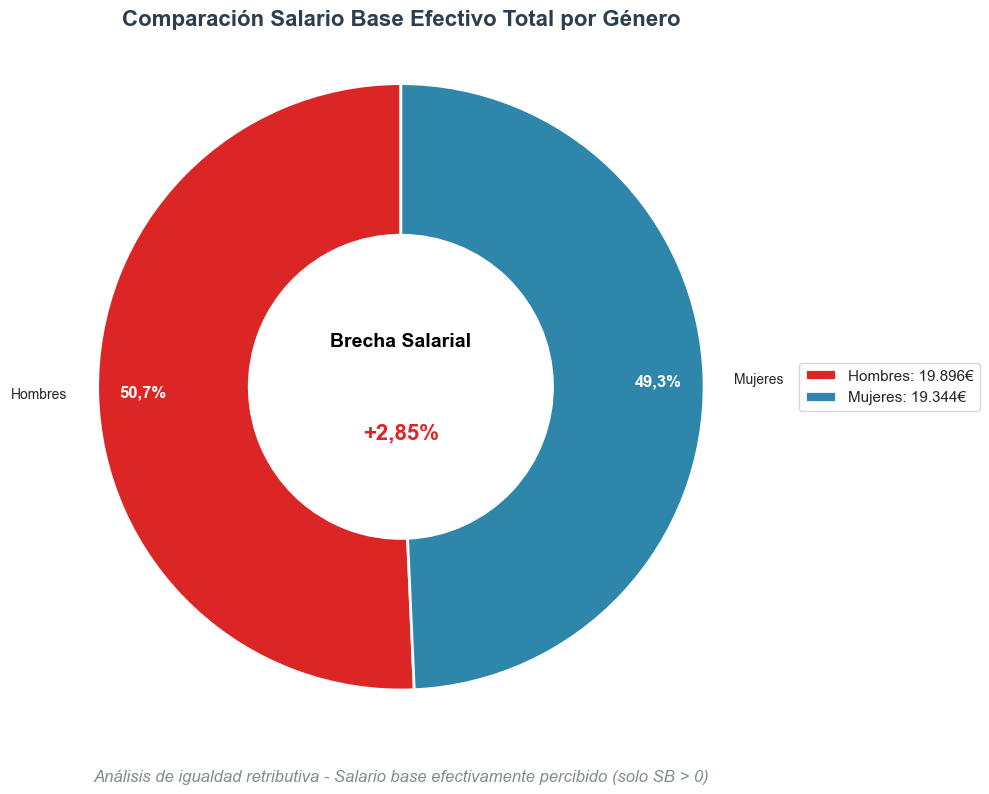

Estadísticas Salario Base Efectivo Total:
   Hombres: 19.895,97€
   Mujeres: 19.344,19€
   Diferencia: 551,78€ (2,9%)
--------------------------------------------------


In [25]:
# GRÁFICOS DE DONUT - SALARIOS EFECTIVOS

# Asegurarse de que tenemos el dataframe principal
if 'df_principal' in locals() and not df_principal.empty:
    df = df_principal.copy()
    
    # Verificar columna de género
    if 'Sexo' in df.columns:
        # Convertir valores de género a los códigos esperados por la función
        df['SEXO'] = df['Sexo'].map({'Hombres': 'H', 'Mujeres': 'M'})
    
    # 1. SALARIO BASE EFECTIVO TOTAL
    print("Creando gráfico de donut para Salario Base Efectivo Total...")
    
    # Usar la columna correcta del análisis
    col_salario_base_efectivo = "Salario base efectivo Total"
    
    if col_salario_base_efectivo in df.columns:
        # Usar función específica para salario base efectivos (solo SB > 0)
        datos_base_efectivo = calcular_promedios_efectivos_sb(df, col_salario_base_efectivo)
        
        fig1 = crear_grafico_donut(
            datos_base_efectivo,
            "Comparación Salario Base Efectivo Total por Género",
            "Análisis de igualdad retributiva - Salario base efectivamente percibido (solo SB > 0)"
        )
        plt.show()
        
        # Mostrar estadísticas con formato español
        diferencia = datos_base_efectivo['H'] - datos_base_efectivo['M']
        porcentaje_diferencia = (diferencia / datos_base_efectivo['M']) * 100 if datos_base_efectivo['M'] > 0 else 0
        
        print(f"Estadísticas Salario Base Efectivo Total:")
        print(f"   Hombres: {formato_numero_es(datos_base_efectivo['H'], 2)}€")
        print(f"   Mujeres: {formato_numero_es(datos_base_efectivo['M'], 2)}€")
        print(f"   Diferencia: {formato_numero_es(diferencia, 2)}€ ({formato_numero_es(porcentaje_diferencia, 1)}%)")
        print("-" * 50)
    else:
        print("No se encontró la columna 'Salario base efectivo Total'")
        print(f"Columnas disponibles: {list(df.columns[:10])}...")

else:
    print("No se pudo cargar el dataset principal")

Creando gráfico de donut para Salario Base + Complementos Salariales Efectivos...


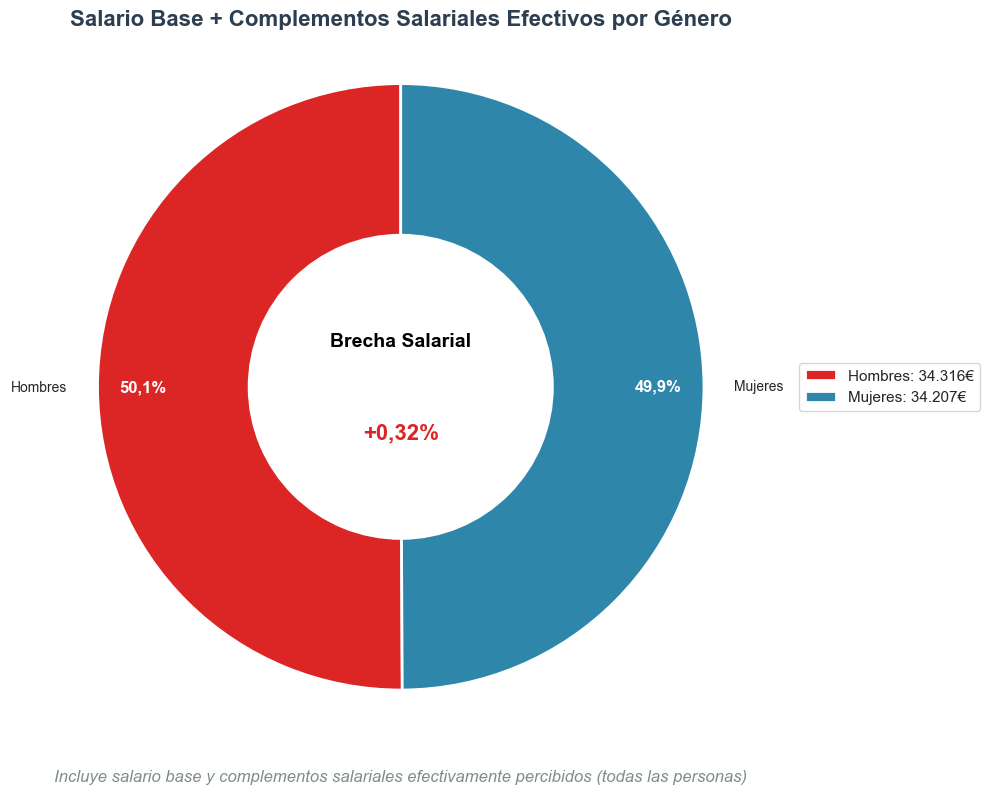

Estadísticas Salario Base + Complementos Salariales Efectivos:
   Hombres: 34.315,85€
   Mujeres: 34.207,18€
   Diferencia: 108,67€ (0,3%)
--------------------------------------------------


In [26]:
# 2. SALARIO BASE + COMPLEMENTOS SALARIALES (EFECTIVOS)
print("Creando gráfico de donut para Salario Base + Complementos Salariales Efectivos...")

# Usar la columna correcta del análisis
col_base_comp_efectivo = "Salario base anual + complementos Total"

if col_base_comp_efectivo in df.columns:
    # Usar función específica para SB + complementos efectivos (incluir todas las personas)
    datos_base_comp_efectivo = calcular_promedios_efectivos_sb_complementos(df, col_base_comp_efectivo)
    
    fig2 = crear_grafico_donut(
        datos_base_comp_efectivo,
        "Salario Base + Complementos Salariales Efectivos por Género",
        "Incluye salario base y complementos salariales efectivamente percibidos (todas las personas)"
    )
    plt.show()
    
    # Mostrar estadísticas con formato español
    diferencia_base_comp = datos_base_comp_efectivo['H'] - datos_base_comp_efectivo['M']
    porcentaje_base_comp = (diferencia_base_comp / datos_base_comp_efectivo['M']) * 100 if datos_base_comp_efectivo['M'] > 0 else 0
    
    print(f"Estadísticas Salario Base + Complementos Salariales Efectivos:")
    print(f"   Hombres: {formato_numero_es(datos_base_comp_efectivo['H'], 2)}€")
    print(f"   Mujeres: {formato_numero_es(datos_base_comp_efectivo['M'], 2)}€")
    print(f"   Diferencia: {formato_numero_es(diferencia_base_comp, 2)}€ ({formato_numero_es(porcentaje_base_comp, 1)}%)")
    print("-" * 50)
else:
    print("No se encontró la columna 'Salario base anual + complementos Total'")

Creando gráfico de donut para SB + Complementos + Extrasalariales Efectivos...


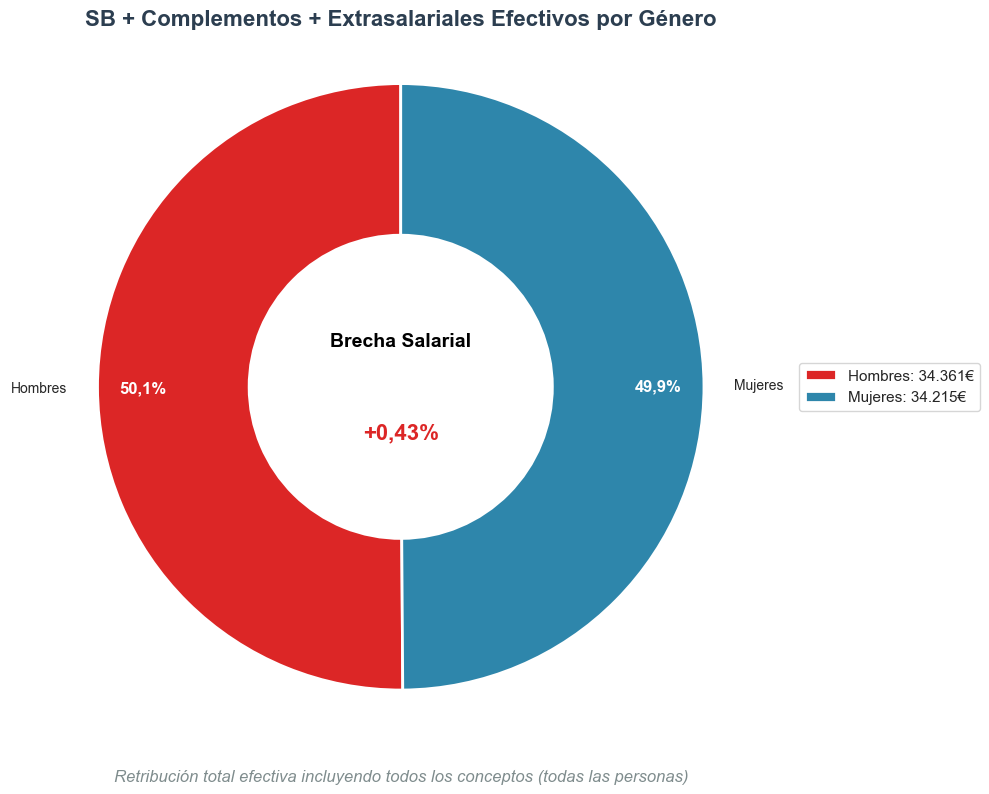

Estadísticas SB + Complementos + Extrasalariales Efectivos:
   Hombres: 34.360,65€
   Mujeres: 34.214,92€
   Diferencia: 145,73€ (0,4%)
--------------------------------------------------


In [27]:
# 3. SALARIO BASE + COMPLEMENTOS + EXTRASALARIALES (EFECTIVOS)
print("Creando gráfico de donut para SB + Complementos + Extrasalariales Efectivos...")

# Usar la columna correcta del análisis
col_total_efectivo = "Salario base anual + complementos + Extrasalariales Total"

if col_total_efectivo in df.columns:
    # Usar función específica para SB + complementos + extrasalariales efectivos (incluir todas las personas)
    datos_total_efectivo = calcular_promedios_efectivos_sb_complementos(df, col_total_efectivo)
    
    fig3 = crear_grafico_donut(
        datos_total_efectivo,
        "SB + Complementos + Extrasalariales Efectivos por Género",
        "Retribución total efectiva incluyendo todos los conceptos (todas las personas)"
    )
    plt.show()
    
    # Mostrar estadísticas con formato español
    diferencia_total_ef = datos_total_efectivo['H'] - datos_total_efectivo['M']
    porcentaje_total_ef = (diferencia_total_ef / datos_total_efectivo['M']) * 100 if datos_total_efectivo['M'] > 0 else 0
    
    print(f"Estadísticas SB + Complementos + Extrasalariales Efectivos:")
    print(f"   Hombres: {formato_numero_es(datos_total_efectivo['H'], 2)}€")
    print(f"   Mujeres: {formato_numero_es(datos_total_efectivo['M'], 2)}€")
    print(f"   Diferencia: {formato_numero_es(diferencia_total_ef, 2)}€ ({formato_numero_es(porcentaje_total_ef, 1)}%)")
    print("-" * 50)
else:
    print("No se encontró la columna 'Salario base anual + complementos + Extrasalariales Total'")


ANÁLISIS DE SALARIOS EQUIPARADOS
Creando gráfico de donut para Salario Base Equiparado...


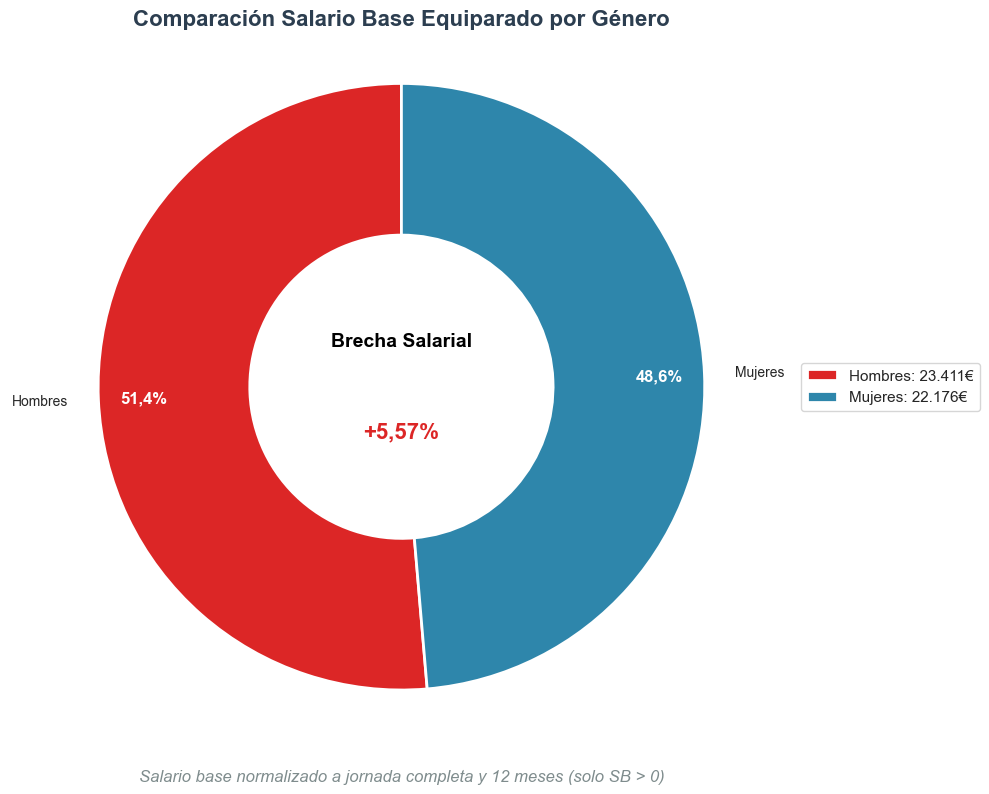

Estadísticas Salario Base Equiparado:
   Hombres: 23.410,97€
   Mujeres: 22.175,96€
   Diferencia: 1.235,01€ (5,6%)
--------------------------------------------------


In [28]:
# GRÁFICOS DE DONUT - SALARIOS EQUIPARADOS

print("\n" + "="*60)
print("ANÁLISIS DE SALARIOS EQUIPARADOS")
print("="*60)

# 4. SALARIO BASE EQUIPARADO
print("Creando gráfico de donut para Salario Base Equiparado...")

# Usar la columna correcta del análisis
col_base_equiparado = "salario_base_equiparado"

if col_base_equiparado in df.columns:
    # Usar función específica para salario base equiparados (solo SB > 0)
    datos_base_equiparado = calcular_promedios_equiparados_sb(df, col_base_equiparado)
    
    fig4 = crear_grafico_donut(
        datos_base_equiparado,
        "Comparación Salario Base Equiparado por Género",
        "Salario base normalizado a jornada completa y 12 meses (solo SB > 0)"
    )
    plt.show()
    
    # Mostrar estadísticas con formato español
    diferencia_base_eq = datos_base_equiparado['H'] - datos_base_equiparado['M']
    porcentaje_base_eq = (diferencia_base_eq / datos_base_equiparado['M']) * 100 if datos_base_equiparado['M'] > 0 else 0
    
    print(f"Estadísticas Salario Base Equiparado:")
    print(f"   Hombres: {formato_numero_es(datos_base_equiparado['H'], 2)}€")
    print(f"   Mujeres: {formato_numero_es(datos_base_equiparado['M'], 2)}€")
    print(f"   Diferencia: {formato_numero_es(diferencia_base_eq, 2)}€ ({formato_numero_es(porcentaje_base_eq, 1)}%)")
    print("-" * 50)
else:
    print("No se encontró la columna 'salario_base_equiparado'")

Creando gráfico de donut para Salario Base + Complementos Salariales Equiparados...


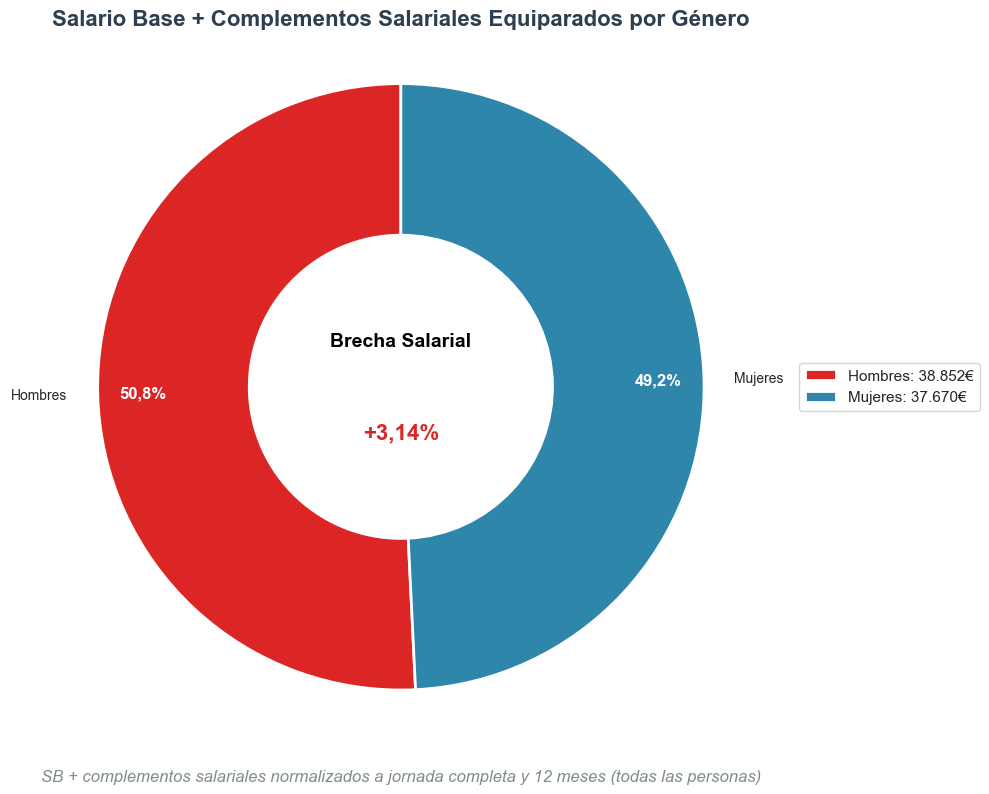

Estadísticas SB + Complementos Salariales Equiparados:
   Hombres: 38.852,42€
   Mujeres: 37.670,45€
   Diferencia: 1.181,97€ (3,1%)
--------------------------------------------------


In [29]:
# 5. SALARIO BASE + COMPLEMENTOS SALARIALES (EQUIPARADOS)
print("Creando gráfico de donut para Salario Base + Complementos Salariales Equiparados...")

# Usar la columna correcta del análisis
col_base_comp_equiparado = "sb_mas_comp_salariales_equiparado"

if col_base_comp_equiparado in df.columns:
    # Usar función específica para SB + complementos equiparados (incluir todas las personas)
    datos_base_comp_eq = calcular_promedios_equiparados_sb_complementos(df, col_base_comp_equiparado)
    
    fig5 = crear_grafico_donut(
        datos_base_comp_eq,
        "Salario Base + Complementos Salariales Equiparados por Género",
        "SB + complementos salariales normalizados a jornada completa y 12 meses (todas las personas)"
    )
    plt.show()
    
    # Mostrar estadísticas con formato español
    diferencia_base_comp_eq = datos_base_comp_eq['H'] - datos_base_comp_eq['M']
    porcentaje_base_comp_eq = (diferencia_base_comp_eq / datos_base_comp_eq['M']) * 100 if datos_base_comp_eq['M'] > 0 else 0
    
    print(f"Estadísticas SB + Complementos Salariales Equiparados:")
    print(f"   Hombres: {formato_numero_es(datos_base_comp_eq['H'], 2)}€")
    print(f"   Mujeres: {formato_numero_es(datos_base_comp_eq['M'], 2)}€")
    print(f"   Diferencia: {formato_numero_es(diferencia_base_comp_eq, 2)}€ ({formato_numero_es(porcentaje_base_comp_eq, 1)}%)")
    print("-" * 50)
else:
    print("No se encontró la columna 'sb_mas_comp_salariales_equiparado'")

Creando gráfico de donut para SB + Complementos + Extrasalariales Equiparados...


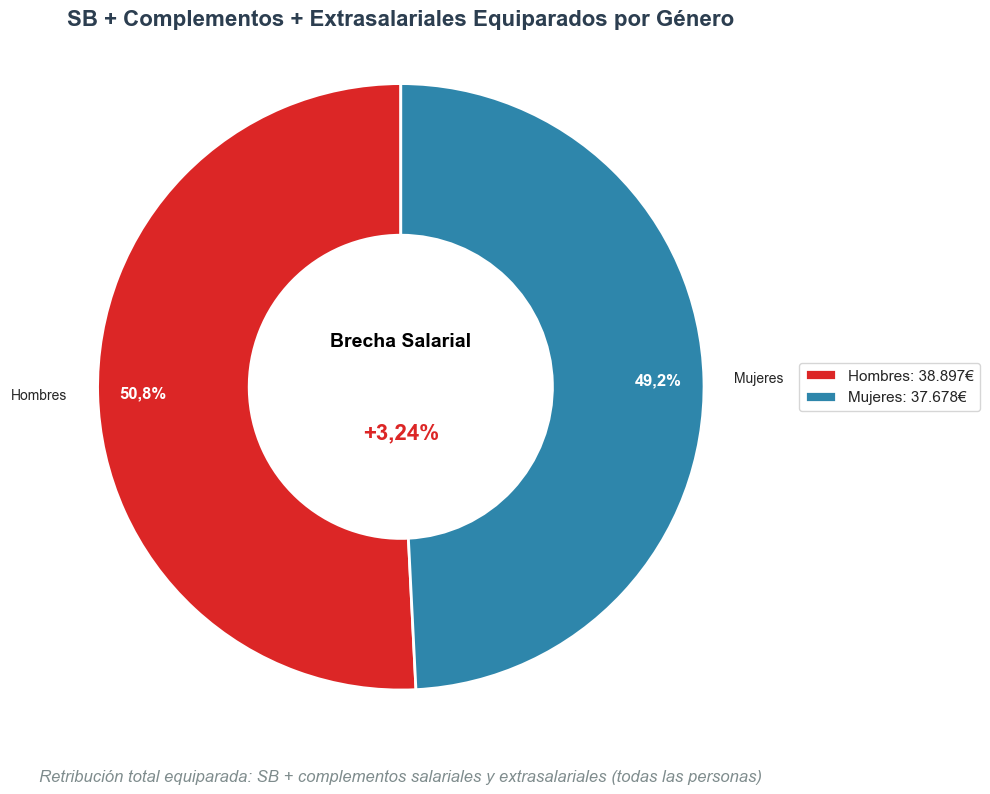

Estadísticas SB + Complementos + Extrasalariales Equiparados:
   Hombres: 38.897,21€
   Mujeres: 37.678,18€
   Diferencia: 1.219,03€ (3,2%)
--------------------------------------------------

Análisis de gráficos de donut completado
Se han generado todos los gráficos de comparación salarial por género

METODOLOGÍA APLICADA:
   EFECTIVOS:
   - Salario Base: Solo personas con SB > 0, excluyendo registros 'Ex'
   - SB + Complementos: Todas las personas (incluye SB = 0), excluyendo registros 'Ex'
   - Usa columnas 'Total efectivo' que suman todas las situaciones contractuales
   EQUIPARADOS:
   - Salario Base: Solo personas con SB base > 0, excluyendo registros 'Ex'
   - SB + Complementos: Todas las personas (incluye SB = 0), excluyendo registros 'Ex'
   - Usa columnas equiparadas basadas en la situación contractual actual


In [30]:
# 6. SALARIO BASE + COMPLEMENTOS + EXTRASALARIALES (EQUIPARADOS)
print("Creando gráfico de donut para SB + Complementos + Extrasalariales Equiparados...")

# Usar la columna correcta del análisis
col_total_equiparado = "sb_mas_comp_total_equiparado"

if col_total_equiparado in df.columns:
    # Usar función específica para SB + complementos + extrasalariales equiparados (incluir todas las personas)
    datos_total_equiparado = calcular_promedios_equiparados_sb_complementos(df, col_total_equiparado)
    
    fig6 = crear_grafico_donut(
        datos_total_equiparado,
        "SB + Complementos + Extrasalariales Equiparados por Género",
        "Retribución total equiparada: SB + complementos salariales y extrasalariales (todas las personas)"
    )
    plt.show()
    
    # Mostrar estadísticas con formato español
    diferencia_total_eq = datos_total_equiparado['H'] - datos_total_equiparado['M']
    porcentaje_total_eq = (diferencia_total_eq / datos_total_equiparado['M']) * 100 if datos_total_equiparado['M'] > 0 else 0
    
    print(f"Estadísticas SB + Complementos + Extrasalariales Equiparados:")
    print(f"   Hombres: {formato_numero_es(datos_total_equiparado['H'], 2)}€")
    print(f"   Mujeres: {formato_numero_es(datos_total_equiparado['M'], 2)}€")
    print(f"   Diferencia: {formato_numero_es(diferencia_total_eq, 2)}€ ({formato_numero_es(porcentaje_total_eq, 1)}%)")
    print("-" * 50)
else:
    print("No se encontró la columna 'sb_mas_comp_total_equiparado'")

print("\nAnálisis de gráficos de donut completado")
print("Se han generado todos los gráficos de comparación salarial por género")
print("\nMETODOLOGÍA APLICADA:")
print("   EFECTIVOS:")
print("   - Salario Base: Solo personas con SB > 0, excluyendo registros 'Ex'")
print("   - SB + Complementos: Todas las personas (incluye SB = 0), excluyendo registros 'Ex'")
print("   - Usa columnas 'Total efectivo' que suman todas las situaciones contractuales")
print("   EQUIPARADOS:")
print("   - Salario Base: Solo personas con SB base > 0, excluyendo registros 'Ex'")
print("   - SB + Complementos: Todas las personas (incluye SB = 0), excluyendo registros 'Ex'")
print("   - Usa columnas equiparadas basadas en la situación contractual actual")


ANÁLISIS POR GRUPO PROFESIONAL - SALARIOS CON COMPLEMENTOS + EXTRASALARIALES
✓ Usando columna de grupo profesional: 'Grupo profesional'
✓ Usando columna de salarios: 'Salario base anual + complementos + Extrasalariales Total'
Registros válidos para análisis: 143

Promedios por Grupo Profesional y Género:
SEXO                           H              M
Grupo profesional                              
4                   27805.673000   26691.232857
5                   40710.966471   35573.386000
6                   46970.953333   39689.976667
7                   89817.350000       0.000000
8                  147612.675000  136032.660000
4 turnos            26818.311930   27867.847333
5 turnos            43567.590000   43466.950000


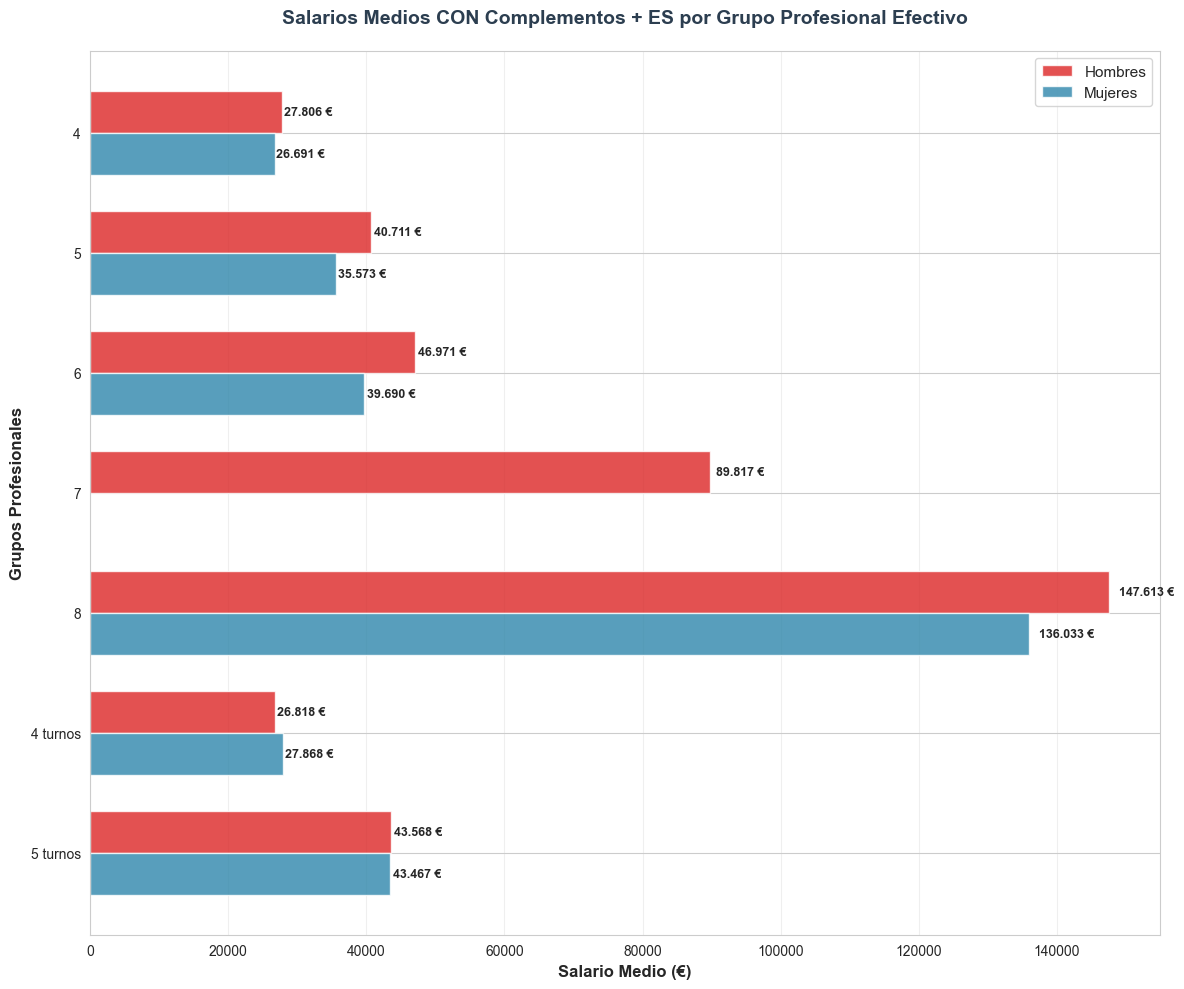


ESTADÍSTICAS DETALLADAS POR GRUPO PROFESIONAL

📊 4:
   Hombres: 27.805,67€
   Mujeres: 26.691,23€
   🔴 Brecha: +4,18%

📊 5:
   Hombres: 40.710,97€
   Mujeres: 35.573,39€
   🔴 Brecha: +14,44%

📊 6:
   Hombres: 46.970,95€
   Mujeres: 39.689,98€
   🔴 Brecha: +18,34%

📊 7:
   Hombres: 89.817,35€

📊 8:
   Hombres: 147.612,67€
   Mujeres: 136.032,66€
   🔴 Brecha: +8,51%

📊 4 turnos:
   Hombres: 26.818,31€
   Mujeres: 27.867,85€
   🔵 Brecha: -3,77%

📊 5 turnos:
   Hombres: 43.567,59€
   Mujeres: 43.466,95€
   🔴 Brecha: +0,23%

✅ Gráfico de barras por grupo profesional completado


In [9]:
# GRÁFICO DE BARRAS - SALARIOS CON COMPLEMENTOS + EXTRASALARIALES POR GRUPO PROFESIONAL

print("\n" + "="*80)
print("ANÁLISIS POR GRUPO PROFESIONAL - SALARIOS CON COMPLEMENTOS + EXTRASALARIALES")
print("="*80)

# Verificar si existe la columna de grupo profesional y la de salarios totales
col_grupo_profesional = None
col_salario_total_efectivo = "Salario base anual + complementos + Extrasalariales Total"

# Buscar la columna de grupo profesional
posibles_columnas_grupo = ['Grupo Profesional', 'grupo_profesional', 'Grupo profesional', 'GRUPO_PROFESIONAL']
for col in posibles_columnas_grupo:
    if col in df.columns:
        col_grupo_profesional = col
        break

if col_grupo_profesional and col_salario_total_efectivo in df.columns:
    print(f"✓ Usando columna de grupo profesional: '{col_grupo_profesional}'")
    print(f"✓ Usando columna de salarios: '{col_salario_total_efectivo}'")
    
    # Filtrar registros actuales (sin "Ex")
    df_activos = df[df.iloc[:, 0] != 'Ex'].copy()
    
    # Filtrar datos válidos (sin nulos)
    df_valido = df_activos[(df_activos[col_grupo_profesional].notna()) & 
                          (df_activos[col_salario_total_efectivo].notna()) &
                          (df_activos['SEXO'].notna())]
    
    print(f"Registros válidos para análisis: {len(df_valido)}")
    
    # Calcular promedios por grupo profesional y género
    promedios_grupo = df_valido.groupby([col_grupo_profesional, 'SEXO'])[col_salario_total_efectivo].mean().unstack(fill_value=0)
    
    # Reordenar columnas para tener H (Hombres) y M (Mujeres)
    if 'H' in promedios_grupo.columns and 'M' in promedios_grupo.columns:
        promedios_grupo = promedios_grupo[['H', 'M']]
    
    print("\nPromedios por Grupo Profesional y Género:")
    print(promedios_grupo)
    
    # Crear el gráfico de barras horizontales
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Configurar posiciones de las barras
    y = np.arange(len(promedios_grupo.index))
    ancho_barra = 0.35
    
    # Crear barras horizontales para hombres y mujeres
    if 'H' in promedios_grupo.columns:
        barras_hombres = ax.barh(y - ancho_barra/2, promedios_grupo['H'], 
                                ancho_barra, label='Hombres', 
                                color=colores_genero['H'], alpha=0.8)
    
    if 'M' in promedios_grupo.columns:
        barras_mujeres = ax.barh(y + ancho_barra/2, promedios_grupo['M'], 
                                ancho_barra, label='Mujeres', 
                                color=colores_genero['M'], alpha=0.8)
    
    # Configurar el gráfico
    ax.set_ylabel('Grupos Profesionales', fontweight='bold', fontsize=12)
    ax.set_xlabel('Salario Medio (€)', fontweight='bold', fontsize=12)
    ax.set_title('Salarios Medios CON Complementos + ES por Grupo Profesional Efectivo', 
                fontweight='bold', fontsize=14, pad=20, color='#2c3e50')
    ax.set_yticks(y)
    ax.set_yticklabels(promedios_grupo.index)
    ax.legend(fontsize=11)
    
    # Añadir valores en las barras horizontales
    def añadir_valores_barras_horizontal(barras):
        for barra in barras:
            anchura = barra.get_width()
            if anchura > 0:  # Solo mostrar si hay valor
                ax.text(anchura + anchura*0.01, barra.get_y() + barra.get_height()/2.,
                       f'{formato_numero_es(anchura, 0)} €',
                       ha='left', va='center', fontweight='bold', fontsize=9)
    
    if 'H' in promedios_grupo.columns:
        añadir_valores_barras_horizontal(barras_hombres)
    if 'M' in promedios_grupo.columns:
        añadir_valores_barras_horizontal(barras_mujeres)
    
    # Ajustar diseño
    plt.tight_layout()
    plt.grid(axis='x', alpha=0.3)
    
    # Invertir el orden del eje Y para que el grupo más alto esté arriba
    ax.invert_yaxis()
    plt.show()
    
    # Mostrar estadísticas detalladas
    print("\n" + "="*60)
    print("ESTADÍSTICAS DETALLADAS POR GRUPO PROFESIONAL")
    print("="*60)
    
    for grupo in promedios_grupo.index:
        print(f"\n📊 {grupo}:")
        if 'H' in promedios_grupo.columns and promedios_grupo.loc[grupo, 'H'] > 0:
            print(f"   Hombres: {formato_numero_es(promedios_grupo.loc[grupo, 'H'], 2)}€")
        if 'M' in promedios_grupo.columns and promedios_grupo.loc[grupo, 'M'] > 0:
            print(f"   Mujeres: {formato_numero_es(promedios_grupo.loc[grupo, 'M'], 2)}€")
        
        # Calcular brecha si ambos géneros tienen datos
        if ('H' in promedios_grupo.columns and 'M' in promedios_grupo.columns and 
            promedios_grupo.loc[grupo, 'H'] > 0 and promedios_grupo.loc[grupo, 'M'] > 0):
            
            diferencia_grupo = promedios_grupo.loc[grupo, 'H'] - promedios_grupo.loc[grupo, 'M']
            porcentaje_grupo = (diferencia_grupo / promedios_grupo.loc[grupo, 'M']) * 100
            
            color_texto = "🔴" if porcentaje_grupo > 0 else "🔵"
            signo = "+" if porcentaje_grupo >= 0 else ""
            print(f"   {color_texto} Brecha: {signo}{formato_numero_es(porcentaje_grupo, 2)}%")
    
    print("\n✅ Gráfico de barras por grupo profesional completado")
    
else:
    print("❌ No se encontraron las columnas necesarias:")
    if not col_grupo_profesional:
        print(f"   - Columna de grupo profesional no encontrada")
        print(f"   - Columnas disponibles: {list(df.columns[:20])}...")
    if col_salario_total_efectivo not in df.columns:
        print(f"   - Columna '{col_salario_total_efectivo}' no encontrada")


ANÁLISIS POR GRUPO PROFESIONAL - SALARIOS CON COMPLEMENTOS + EXTRASALARIALES EQUIPARADOS
✓ Usando columna de grupo profesional: 'Grupo profesional'
✓ Usando columna de salarios equiparados: 'sb_mas_comp_total_equiparado'
Registros válidos para análisis: 143

Promedios Equiparados por Grupo Profesional y Género:
SEXO                           H              M
Grupo profesional                              
4                   32053.431945   31352.552642
5                   41562.302767   37621.969532
6                   46970.953333   47466.658254
7                   89817.350000       0.000000
8                  147612.675000  136032.660000
4 turnos            32898.509057   31781.763357
5 turnos            44385.586323   43466.950000


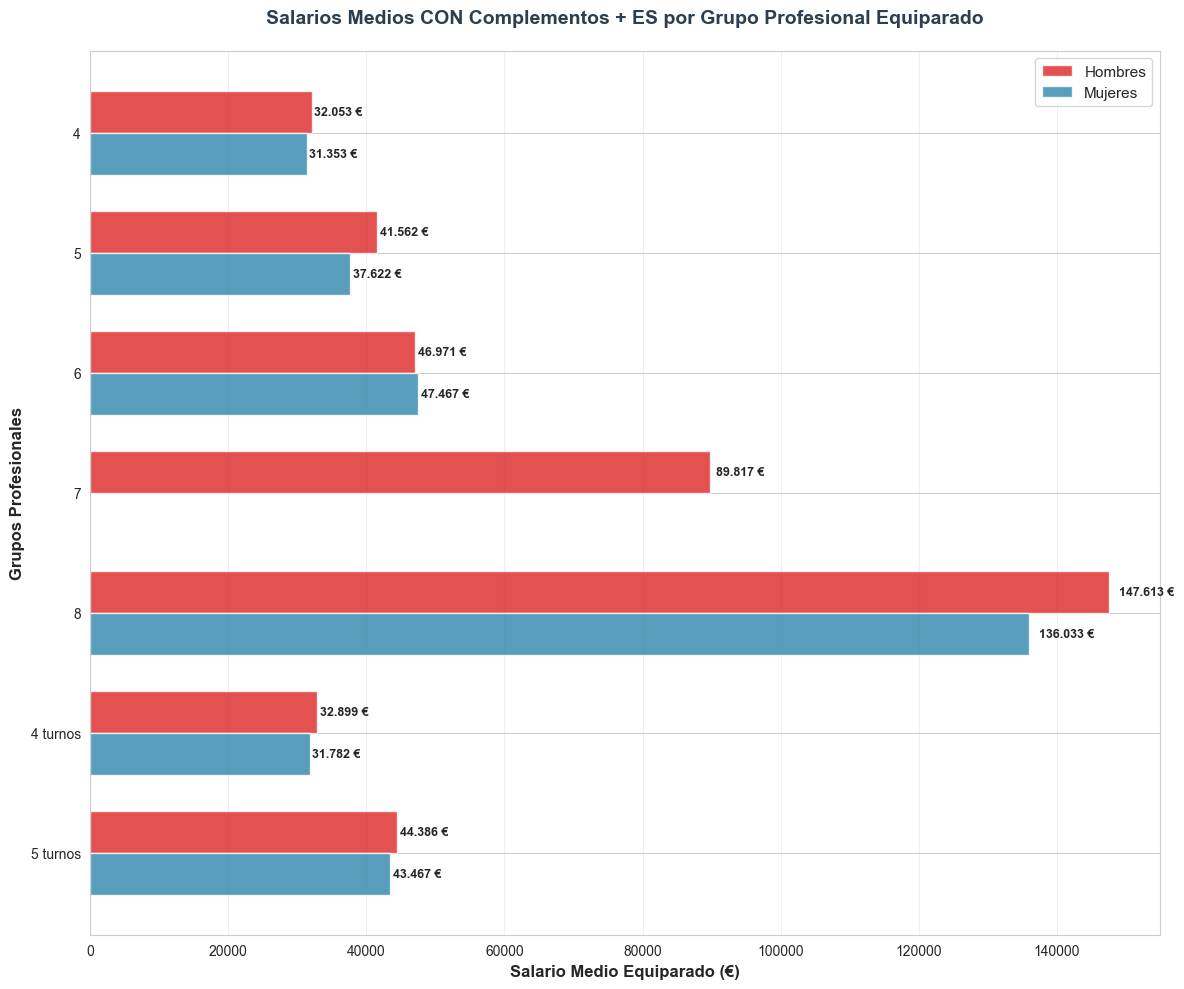


ESTADÍSTICAS DETALLADAS POR GRUPO PROFESIONAL - EQUIPARADOS

📊 4:
   Hombres: 32.053,43€
   Mujeres: 31.352,55€
   🔴 Brecha: +2,24%

📊 5:
   Hombres: 41.562,30€
   Mujeres: 37.621,97€
   🔴 Brecha: +10,47%

📊 6:
   Hombres: 46.970,95€
   Mujeres: 47.466,66€
   🔵 Brecha: -1,04%

📊 7:
   Hombres: 89.817,35€

📊 8:
   Hombres: 147.612,67€
   Mujeres: 136.032,66€
   🔴 Brecha: +8,51%

📊 4 turnos:
   Hombres: 32.898,51€
   Mujeres: 31.781,76€
   🔴 Brecha: +3,51%

📊 5 turnos:
   Hombres: 44.385,59€
   Mujeres: 43.466,95€
   🔴 Brecha: +2,11%

✅ Gráfico de barras equiparadas por grupo profesional completado


In [10]:
# GRÁFICO DE BARRAS - SALARIOS CON COMPLEMENTOS + EXTRASALARIALES EQUIPARADOS POR GRUPO PROFESIONAL

print("\n" + "="*80)
print("ANÁLISIS POR GRUPO PROFESIONAL - SALARIOS CON COMPLEMENTOS + EXTRASALARIALES EQUIPARADOS")
print("="*80)

# Verificar si existe la columna de grupo profesional y la de salarios totales equiparados
col_grupo_profesional = None
col_salario_total_equiparado = "sb_mas_comp_total_equiparado"

# Buscar la columna de grupo profesional
posibles_columnas_grupo = ['Grupo Profesional', 'grupo_profesional', 'Grupo profesional', 'GRUPO_PROFESIONAL']
for col in posibles_columnas_grupo:
    if col in df.columns:
        col_grupo_profesional = col
        break

if col_grupo_profesional and col_salario_total_equiparado in df.columns:
    print(f"✓ Usando columna de grupo profesional: '{col_grupo_profesional}'")
    print(f"✓ Usando columna de salarios equiparados: '{col_salario_total_equiparado}'")
    
    # Filtrar registros actuales (sin "Ex")
    df_activos = df[df.iloc[:, 0] != 'Ex'].copy()
    
    # Filtrar datos válidos (sin nulos)
    df_valido = df_activos[(df_activos[col_grupo_profesional].notna()) & 
                          (df_activos[col_salario_total_equiparado].notna()) &
                          (df_activos['SEXO'].notna())]
    
    print(f"Registros válidos para análisis: {len(df_valido)}")
    
    # Calcular promedios por grupo profesional y género
    promedios_grupo_eq = df_valido.groupby([col_grupo_profesional, 'SEXO'])[col_salario_total_equiparado].mean().unstack(fill_value=0)
    
    # Reordenar columnas para tener H (Hombres) y M (Mujeres)
    if 'H' in promedios_grupo_eq.columns and 'M' in promedios_grupo_eq.columns:
        promedios_grupo_eq = promedios_grupo_eq[['H', 'M']]
    
    print("\nPromedios Equiparados por Grupo Profesional y Género:")
    print(promedios_grupo_eq)
    
    # Crear el gráfico de barras horizontales
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Configurar posiciones de las barras
    y = np.arange(len(promedios_grupo_eq.index))
    ancho_barra = 0.35
    
    # Crear barras horizontales para hombres y mujeres
    if 'H' in promedios_grupo_eq.columns:
        barras_hombres = ax.barh(y - ancho_barra/2, promedios_grupo_eq['H'], 
                                ancho_barra, label='Hombres', 
                                color=colores_genero['H'], alpha=0.8)
    
    if 'M' in promedios_grupo_eq.columns:
        barras_mujeres = ax.barh(y + ancho_barra/2, promedios_grupo_eq['M'], 
                                ancho_barra, label='Mujeres', 
                                color=colores_genero['M'], alpha=0.8)
    
    # Configurar el gráfico
    ax.set_ylabel('Grupos Profesionales', fontweight='bold', fontsize=12)
    ax.set_xlabel('Salario Medio Equiparado (€)', fontweight='bold', fontsize=12)
    ax.set_title('Salarios Medios CON Complementos + ES por Grupo Profesional Equiparado', 
                fontweight='bold', fontsize=14, pad=20, color='#2c3e50')
    ax.set_yticks(y)
    ax.set_yticklabels(promedios_grupo_eq.index)
    ax.legend(fontsize=11)
    
    # Añadir valores en las barras horizontales
    def añadir_valores_barras_horizontal(barras):
        for barra in barras:
            anchura = barra.get_width()
            if anchura > 0:  # Solo mostrar si hay valor
                ax.text(anchura + anchura*0.01, barra.get_y() + barra.get_height()/2.,
                       f'{formato_numero_es(anchura, 0)} €',
                       ha='left', va='center', fontweight='bold', fontsize=9)
    
    if 'H' in promedios_grupo_eq.columns:
        añadir_valores_barras_horizontal(barras_hombres)
    if 'M' in promedios_grupo_eq.columns:
        añadir_valores_barras_horizontal(barras_mujeres)
    
    # Ajustar diseño
    plt.tight_layout()
    plt.grid(axis='x', alpha=0.3)
    
    # Invertir el orden del eje Y para que el grupo más alto esté arriba
    ax.invert_yaxis()
    plt.show()
    
    # Mostrar estadísticas detalladas
    print("\n" + "="*60)
    print("ESTADÍSTICAS DETALLADAS POR GRUPO PROFESIONAL - EQUIPARADOS")
    print("="*60)
    
    for grupo in promedios_grupo_eq.index:
        print(f"\n📊 {grupo}:")
        if 'H' in promedios_grupo_eq.columns and promedios_grupo_eq.loc[grupo, 'H'] > 0:
            print(f"   Hombres: {formato_numero_es(promedios_grupo_eq.loc[grupo, 'H'], 2)}€")
        if 'M' in promedios_grupo_eq.columns and promedios_grupo_eq.loc[grupo, 'M'] > 0:
            print(f"   Mujeres: {formato_numero_es(promedios_grupo_eq.loc[grupo, 'M'], 2)}€")
        
        # Calcular brecha si ambos géneros tienen datos
        if ('H' in promedios_grupo_eq.columns and 'M' in promedios_grupo_eq.columns and 
            promedios_grupo_eq.loc[grupo, 'H'] > 0 and promedios_grupo_eq.loc[grupo, 'M'] > 0):
            
            diferencia_grupo = promedios_grupo_eq.loc[grupo, 'H'] - promedios_grupo_eq.loc[grupo, 'M']
            porcentaje_grupo = (diferencia_grupo / promedios_grupo_eq.loc[grupo, 'M']) * 100
            
            color_texto = "🔴" if porcentaje_grupo > 0 else "🔵"
            signo = "+" if porcentaje_grupo >= 0 else ""
            print(f"   {color_texto} Brecha: {signo}{formato_numero_es(porcentaje_grupo, 2)}%")
    
    print("\n✅ Gráfico de barras equiparadas por grupo profesional completado")
    
else:
    print("❌ No se encontraron las columnas necesarias:")
    if not col_grupo_profesional:
        print(f"   - Columna de grupo profesional no encontrada")
        print(f"   - Columnas disponibles: {list(df.columns[:20])}...")
    if col_salario_total_equiparado not in df.columns:
        print(f"   - Columna '{col_salario_total_equiparado}' no encontrada")


ANÁLISIS POR CATEGORÍA PROFESIONAL - SALARIOS CON COMPLEMENTOS + EXTRASALARIALES
✓ Usando columna de categorización: 'Grupo profesional' (143 registros con datos)
✓ Usando columna de salarios: 'Salario base anual + complementos + Extrasalariales Total'
Registros válidos para análisis: 143

Categorías profesionales encontradas:
   - 4 turnos: 72 personas
   - 5: 32 personas
   - 4: 17 personas
   - 5 turnos: 12 personas
   - 6: 6 personas
   - 8: 3 personas
   - 7: 1 personas

Promedios por Categoría Profesional y Género:
SEXO                           H              M
Grupo profesional                              
4                   27805.673000   26691.232857
5                   40710.966471   35573.386000
6                   46970.953333   39689.976667
7                   89817.350000       0.000000
8                  147612.675000  136032.660000
4 turnos            26818.311930   27867.847333
5 turnos            43567.590000   43466.950000


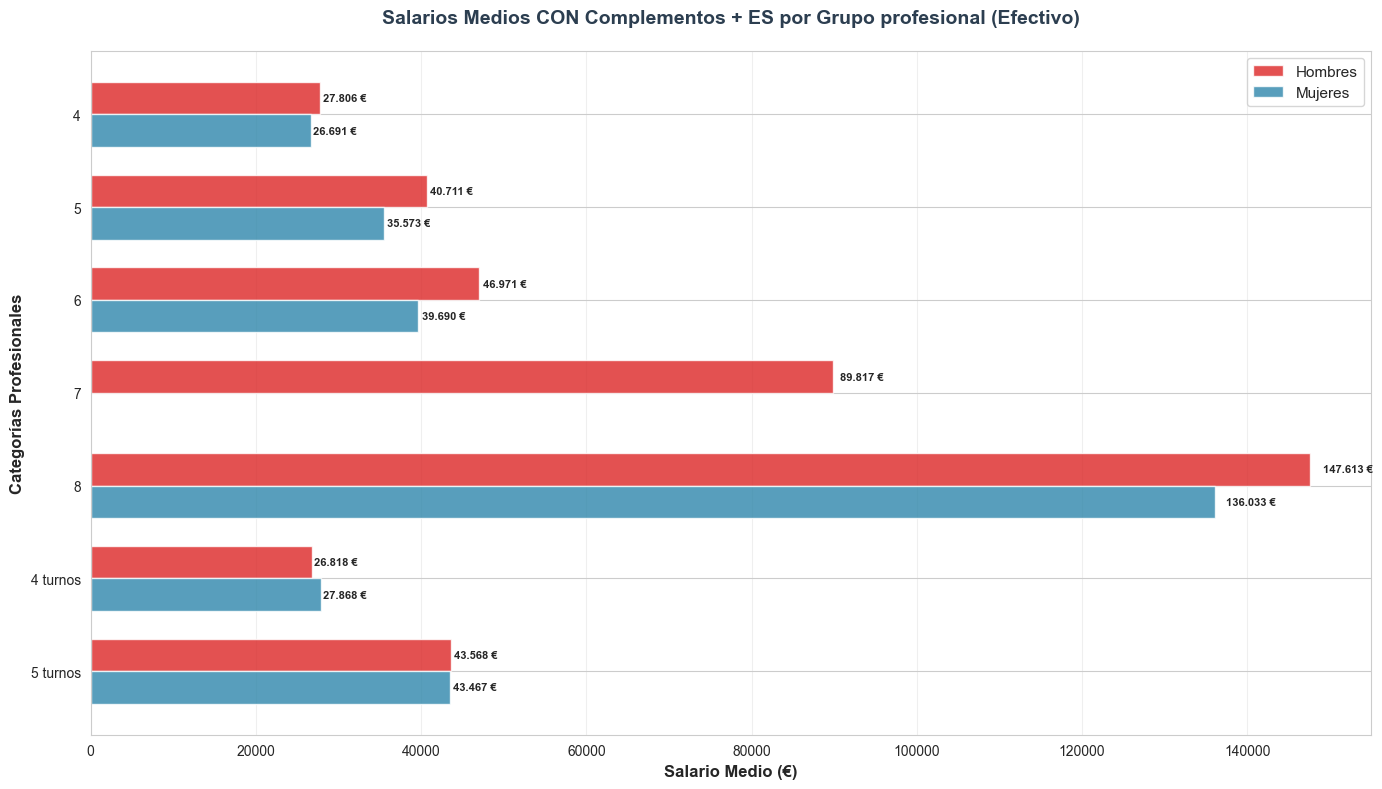


ESTADÍSTICAS DETALLADAS POR GRUPO PROFESIONAL

📊 4:
   Hombres: 27.805,67€
   Mujeres: 26.691,23€
   🔴 Brecha: +4,18%

📊 5:
   Hombres: 40.710,97€
   Mujeres: 35.573,39€
   🔴 Brecha: +14,44%

📊 6:
   Hombres: 46.970,95€
   Mujeres: 39.689,98€
   🔴 Brecha: +18,34%

📊 7:
   Hombres: 89.817,35€

📊 8:
   Hombres: 147.612,67€
   Mujeres: 136.032,66€
   🔴 Brecha: +8,51%

📊 4 turnos:
   Hombres: 26.818,31€
   Mujeres: 27.867,85€
   🔵 Brecha: -3,77%

📊 5 turnos:
   Hombres: 43.567,59€
   Mujeres: 43.466,95€
   🔴 Brecha: +0,23%

✅ Gráfico de barras por grupo profesional completado


In [11]:
# GRÁFICO DE BARRAS - SALARIOS CON COMPLEMENTOS + EXTRASALARIALES POR CATEGORÍA PROFESIONAL

print("\n" + "="*80)
print("ANÁLISIS POR CATEGORÍA PROFESIONAL - SALARIOS CON COMPLEMENTOS + EXTRASALARIALES")
print("="*80)

# Verificar si existe alguna columna de categorización profesional y la de salarios totales
col_categoria_profesional = None
col_salario_total_efectivo = "Salario base anual + complementos + Extrasalariales Total"

# Buscar columnas de categorización profesional (intentar diferentes opciones)
posibles_columnas_categoria = [
    'Grupo profesional',  # Principal opción
    'Tipo de contratación ',  # Alternativa 1
    'Tipo de vinculación',    # Alternativa 2
    'Subgrupo profesional ',  # Alternativa 3 (aunque está vacía)
]

for col in posibles_columnas_categoria:
    if col in df.columns:
        # Verificar que la columna tenga datos válidos
        df_temp = df[df.iloc[:, 0] != 'Ex'].copy()
        valores_no_nulos = df_temp[col].notna().sum()
        if valores_no_nulos > 0:
            col_categoria_profesional = col
            print(f"✓ Usando columna de categorización: '{col}' ({valores_no_nulos} registros con datos)")
            break

if col_categoria_profesional and col_salario_total_efectivo in df.columns:
    print(f"✓ Usando columna de salarios: '{col_salario_total_efectivo}'")
    
    # Filtrar registros actuales (sin "Ex")
    df_activos = df[df.iloc[:, 0] != 'Ex'].copy()
    
    # Filtrar datos válidos (sin nulos)
    df_valido = df_activos[(df_activos[col_categoria_profesional].notna()) & 
                          (df_activos[col_salario_total_efectivo].notna()) &
                          (df_activos['SEXO'].notna())]
    
    print(f"Registros válidos para análisis: {len(df_valido)}")
    
    # Mostrar las categorías disponibles
    print(f"\nCategorías profesionales encontradas:")
    categorias_unicas = df_valido[col_categoria_profesional].value_counts()
    for categoria, count in categorias_unicas.items():
        print(f"   - {categoria}: {count} personas")
    
    # Calcular promedios por categoría profesional y género
    promedios_categoria = df_valido.groupby([col_categoria_profesional, 'SEXO'])[col_salario_total_efectivo].mean().unstack(fill_value=0)
    
    # Reordenar columnas para tener H (Hombres) y M (Mujeres)
    if 'H' in promedios_categoria.columns and 'M' in promedios_categoria.columns:
        promedios_categoria = promedios_categoria[['H', 'M']]
    
    print("\nPromedios por Categoría Profesional y Género:")
    print(promedios_categoria)
    
    # Solo continuar si hay datos para mostrar
    if len(promedios_categoria) > 0:
        # Crear el gráfico de barras horizontales
        fig, ax = plt.subplots(figsize=(14, max(8, len(promedios_categoria) * 0.8)))  # Altura dinámica
        
        # Configurar posiciones de las barras
        y = np.arange(len(promedios_categoria.index))
        ancho_barra = 0.35
        
        # Crear barras horizontales para hombres y mujeres
        if 'H' in promedios_categoria.columns:
            barras_hombres = ax.barh(y - ancho_barra/2, promedios_categoria['H'], 
                                    ancho_barra, label='Hombres', 
                                    color=colores_genero['H'], alpha=0.8)
        
        if 'M' in promedios_categoria.columns:
            barras_mujeres = ax.barh(y + ancho_barra/2, promedios_categoria['M'], 
                                    ancho_barra, label='Mujeres', 
                                    color=colores_genero['M'], alpha=0.8)
        
        # Configurar el gráfico
        ax.set_ylabel('Categorías Profesionales', fontweight='bold', fontsize=12)
        ax.set_xlabel('Salario Medio (€)', fontweight='bold', fontsize=12)
        ax.set_title(f'Salarios Medios CON Complementos + ES por {col_categoria_profesional} (Efectivo)', 
                    fontweight='bold', fontsize=14, pad=20, color='#2c3e50')
        ax.set_yticks(y)
        ax.set_yticklabels(promedios_categoria.index, fontsize=10)
        ax.legend(fontsize=11)
        
        # Añadir valores en las barras horizontales
        def añadir_valores_barras_horizontal(barras):
            for barra in barras:
                anchura = barra.get_width()
                if anchura > 0:  # Solo mostrar si hay valor
                    ax.text(anchura + anchura*0.01, barra.get_y() + barra.get_height()/2.,
                           f'{formato_numero_es(anchura, 0)} €',
                           ha='left', va='center', fontweight='bold', fontsize=8)
        
        if 'H' in promedios_categoria.columns:
            añadir_valores_barras_horizontal(barras_hombres)
        if 'M' in promedios_categoria.columns:
            añadir_valores_barras_horizontal(barras_mujeres)
        
        # Ajustar diseño
        plt.tight_layout()
        plt.grid(axis='x', alpha=0.3)
        
        # Invertir el orden del eje Y para que la categoría más alta esté arriba
        ax.invert_yaxis()
        plt.show()
        
        # Mostrar estadísticas detalladas
        print("\n" + "="*60)
        print(f"ESTADÍSTICAS DETALLADAS POR {col_categoria_profesional.upper()}")
        print("="*60)
        
        for categoria in promedios_categoria.index:
            print(f"\n📊 {categoria}:")
            if 'H' in promedios_categoria.columns and promedios_categoria.loc[categoria, 'H'] > 0:
                print(f"   Hombres: {formato_numero_es(promedios_categoria.loc[categoria, 'H'], 2)}€")
            if 'M' in promedios_categoria.columns and promedios_categoria.loc[categoria, 'M'] > 0:
                print(f"   Mujeres: {formato_numero_es(promedios_categoria.loc[categoria, 'M'], 2)}€")
            
            # Calcular brecha si ambos géneros tienen datos
            if ('H' in promedios_categoria.columns and 'M' in promedios_categoria.columns and 
                promedios_categoria.loc[categoria, 'H'] > 0 and promedios_categoria.loc[categoria, 'M'] > 0):
                
                diferencia_categoria = promedios_categoria.loc[categoria, 'H'] - promedios_categoria.loc[categoria, 'M']
                porcentaje_categoria = (diferencia_categoria / promedios_categoria.loc[categoria, 'M']) * 100
                
                color_texto = "🔴" if porcentaje_categoria > 0 else "🔵"
                signo = "+" if porcentaje_categoria >= 0 else ""
                print(f"   {color_texto} Brecha: {signo}{formato_numero_es(porcentaje_categoria, 2)}%")
        
        print(f"\n✅ Gráfico de barras por {col_categoria_profesional.lower()} completado")
    else:
        print("❌ No hay datos suficientes para crear el gráfico")
    
else:
    print("❌ No se encontraron las columnas necesarias:")
    if not col_categoria_profesional:
        print(f"   - No se encontró ninguna columna de categorización profesional con datos válidos")
        print(f"   - Columnas intentadas: {posibles_columnas_categoria}")
    if col_salario_total_efectivo not in df.columns:
        print(f"   - Columna '{col_salario_total_efectivo}' no encontrada")